# Importing Libraries

In [ ]:
#Preprocessing Libraries
import pandas as pd
import numpy as np

#Visualizing Libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#For Modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold, StratifiedKFold
from sklearn.linear_model import LogisticRegression, SGDClassifier 
from sklearn.svm import LinearSVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay 
from sklearn.model_selection import GridSearchCV 
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer 
from xgboost import XGBClassifier
import operator

# Preprocessing

In [ ]:
df_train=pd.read_csv("/content/drive/MyDrive/Praneeth/train.csv")

df_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
df_train.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

## **EDA**

Checking the Co-Relation Between Columns 

In [ ]:
corelation = df_train.corr()

In [ ]:
corelation

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


To see it in a better way lets visulalise it using seaborn heatmap

<ipython-input-16-318313229164>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corelation, dtype=np.bool))


Text(0.5, 1.0, 'Corelation Heat Map')

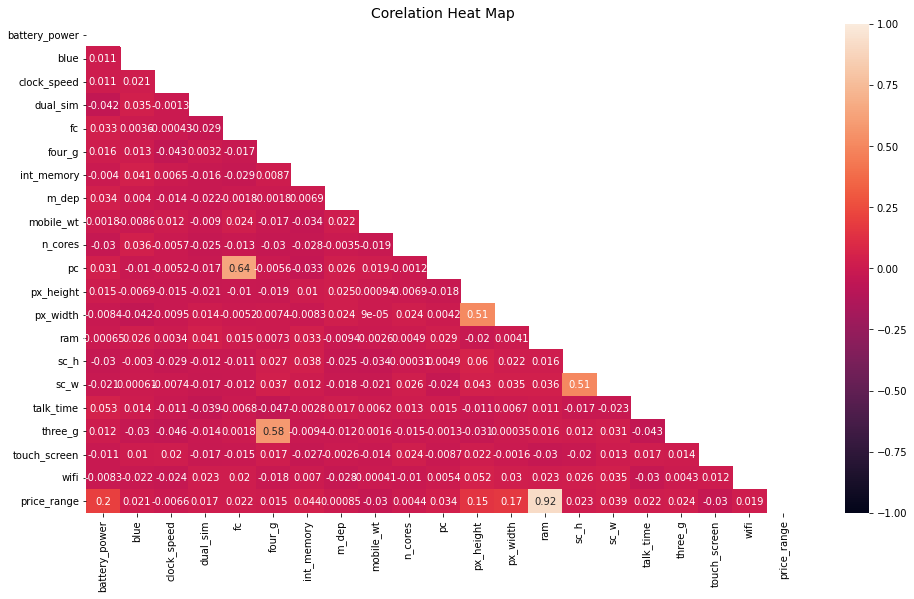

In [ ]:
plt.figure(figsize=(16,9))
mask = np.triu(np.ones_like(corelation, dtype=np.bool))
sns.heatmap(corelation,vmin=-1,vmax=1,mask=mask,annot=True)
plt.title("Corelation Heat Map",size=14)

Based on the data we could infer Ram , Battery Power have siginificant affect on price range

To know more lets see which factors affects the price range using Co-Relation Heatmap

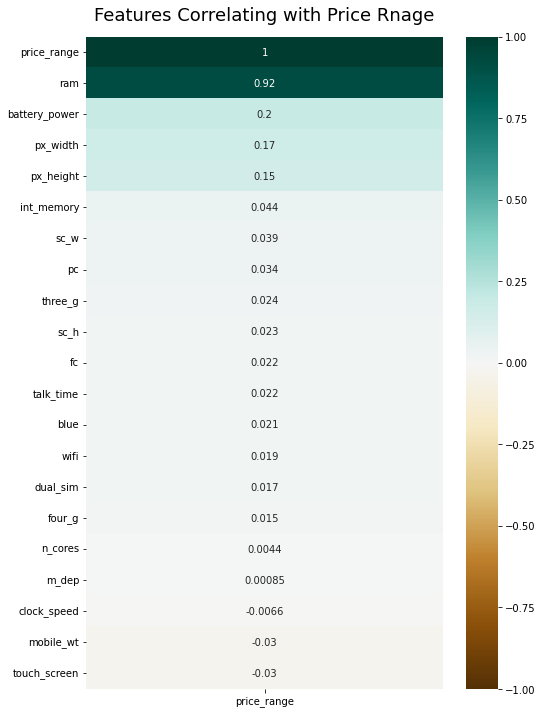

In [ ]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(corelation[['price_range']].sort_values(by='price_range', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Price Rnage', fontdict={'fontsize':18}, pad=16);

# Modeling

Lets divide the data set into trainning and testing with the help of sklearn 

In [ ]:
X =  df_train.drop(columns='price_range')
Y = df_train.price_range

In [ ]:
X.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [ ]:
Y

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

In [ ]:
#Dividing the data into 80:20 format 
X_train, X_test, y_train, y_test = train_test_split(X, Y,train_size=.8, random_state=45)

## **KNN**

In [ ]:
knn = KNeighborsClassifier(n_neighbors=8)
knn = knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
# Preciision, recall, f-score from the multi-class support function

In [ ]:
print(classification_report(y_test, y_pred))

knn_score=knn.score(X_test, y_test)

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       104
           1       0.95      0.90      0.93       114
           2       0.90      0.94      0.92       105
           3       0.97      0.88      0.93        77

    accuracy                           0.93       400
   macro avg       0.94      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400



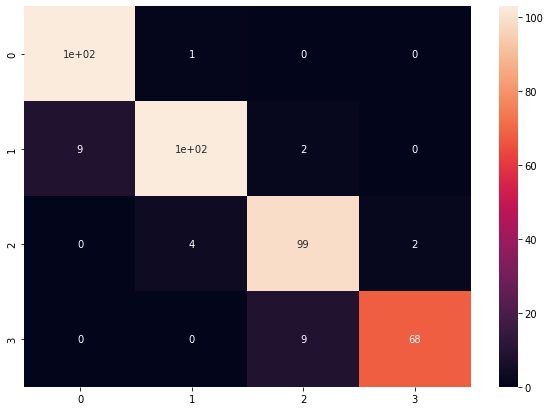

In [ ]:
matrix=confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,7))
sns.heatmap(matrix,annot=True)

## **Decision Tree**

In [ ]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
Decision_Tree_Score=model.score(X_test, y_test)
y_pred = model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       104
           1       0.79      0.82      0.81       114
           2       0.83      0.76      0.80       105
           3       0.85      0.90      0.87        77

    accuracy                           0.84       400
   macro avg       0.84      0.84      0.84       400
weighted avg       0.84      0.84      0.84       400



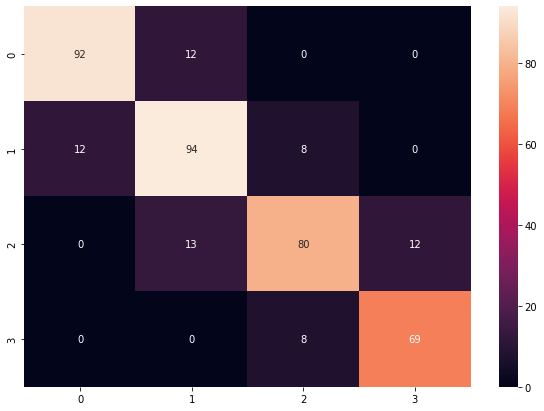

In [ ]:
matrix=confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,7))
sns.heatmap(matrix,annot=True)

## **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_Rfc = RandomForestClassifier(n_estimators=200)
model_Rfc.fit(X_train, y_train)

y_pred = model_Rfc.predict(X_test)

Random_Forest_score=model_Rfc.score(X_test, y_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       104
           1       0.88      0.83      0.86       114
           2       0.86      0.89      0.87       105
           3       0.96      0.95      0.95        77

    accuracy                           0.90       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.90      0.90      0.90       400



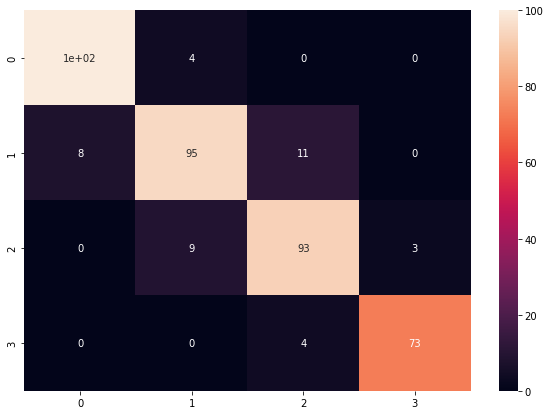

In [ ]:
matrix=confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,7))
sns.heatmap(matrix,annot=True)

## **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()

logmodel.fit(X_train,y_train)

y_pred=logmodel.predict(X_test)

logmodel_score=logmodel.score(X_test, y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.77      0.80       104
           1       0.56      0.56      0.56       114
           2       0.51      0.39      0.44       105
           3       0.59      0.86      0.70        77

    accuracy                           0.63       400
   macro avg       0.63      0.64      0.63       400
weighted avg       0.63      0.63      0.62       400



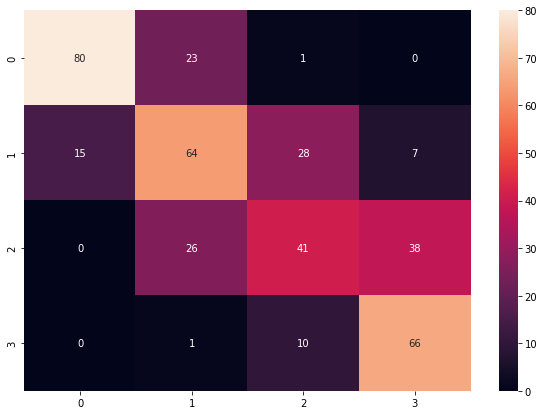

In [ ]:
matrix=confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,7))
sns.heatmap(matrix,annot=True)

In [ ]:
logmodel.score(X_test,y_test)

0.6275

## **Support Vector Machine**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

clf = SVC(kernel='linear')
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

clf_score=clf.score(X_test, y_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       104
           1       0.97      0.99      0.98       114
           2       0.97      0.97      0.97       105
           3       1.00      0.96      0.98        77

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400



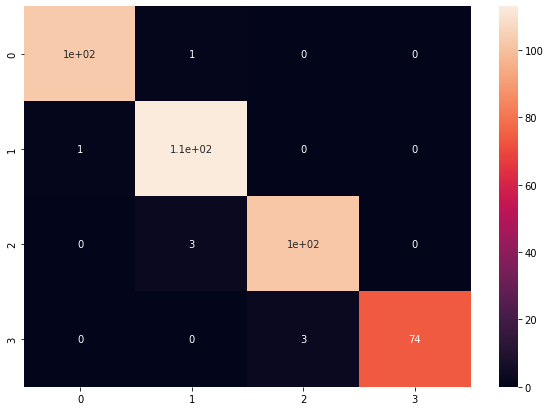

In [ ]:
matrix=confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,7))
sns.heatmap(matrix,annot=True)

## Results

In [ ]:
results=[]

results.append(clf_score)
results.append(logmodel_score)
results.append(Random_Forest_score)
results.append(Decision_Tree_Score)
results.append(knn_score)

names=["SVM","Logistic_Regression","Random_Forest","Decision_Tree","KNN"]

results=list(map(lambda x:round(x*100,2),results))

results

[98.0, 62.75, 90.25, 83.75, 93.25]

Text(0.5, 1.0, 'Models and their Accuracies')

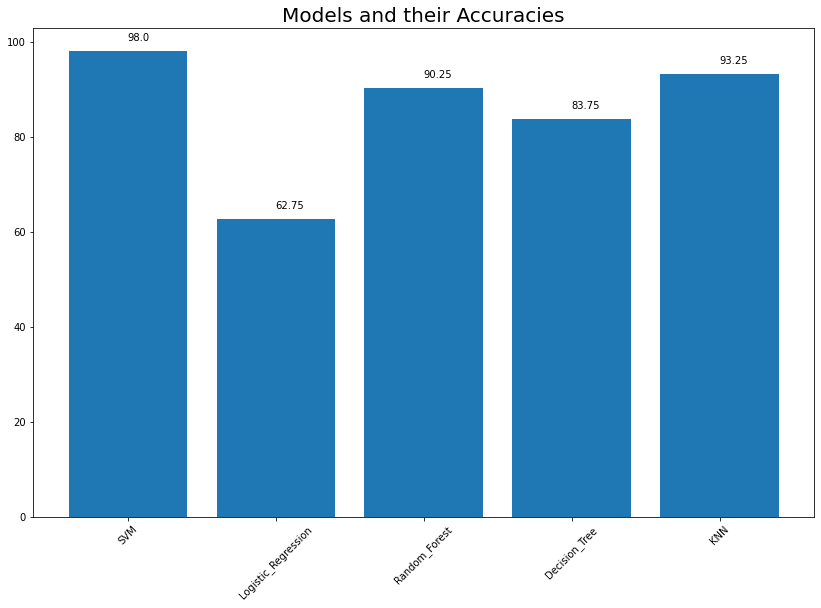

In [ ]:
plt.figure(figsize=(14,9))

plt.bar(range(len(results)),results)
plt.xticks(range(len(results)),names,rotation=45)

for i in range(len(results)):
    plt.annotate(str(results[i]), (i, results[i]), xytext=(0, 10), textcoords='offset points')


plt.title("Models and their Accuracies",size=20)

Based on the above information we could infer that SVM is doing good with accuracy of 98

Therefore assign the prices of test data with the help of SVM

In [ ]:
df_test=pd.read_csv("/content/drive/MyDrive/Praneeth/test.csv")

In [ ]:
df_test.columns
df_test.drop("id",axis=1,inplace=True)

In [ ]:
df_test["price"]=clf.predict(df_test)

In [ ]:
df_test

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price
0,1043,1,1.8,1,14,0,5,0.1,193,3,...,226,1412,3476,12,7,2,0,1,0,3
1,841,1,0.5,1,4,1,61,0.8,191,5,...,746,857,3895,6,0,7,1,0,0,3
2,1807,1,2.8,0,1,0,27,0.9,186,3,...,1270,1366,2396,17,10,10,0,1,1,2
3,1546,0,0.5,1,18,1,25,0.5,96,8,...,295,1752,3893,10,0,7,1,1,0,3
4,1434,0,1.4,0,11,1,49,0.5,108,6,...,749,810,1773,15,8,7,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1700,1,1.9,0,0,1,54,0.5,170,7,...,644,913,2121,14,8,15,1,1,0,2
996,609,0,1.8,1,0,0,13,0.9,186,4,...,1152,1632,1933,8,1,19,0,1,1,1
997,1185,0,1.4,0,1,1,8,0.5,80,1,...,477,825,1223,5,0,14,1,0,0,0
998,1533,1,0.5,1,0,0,50,0.4,171,2,...,38,832,2509,15,11,6,0,1,0,2


Conclusion::

Based on SVM, we succefully completed our objective that is classifing the price range of mobiles based on features of mobiles on test data